# Prédiction Linéaire de w en fonction de x, y et z



Obtenir les tenseurs de données
-------------------------------

"A la main" tout d'abord:

In [1]:
file = open("xyzw.csv", mode="rt", encoding="ascii")
content = file.read()
file.close()
xs = []
ys = []
zs = []
ws = []
for i, line in enumerate(content.splitlines()):
    if i != 0:
        # print(line)
        index, x, y, z, w = line.split(",")
        xs.append(float(x))
        ys.append(float(y))
        zs.append(float(z))
        ws.append(float(w))

In [2]:
import torch 
xyz = torch.tensor([xs, ys, zs]).T
w = torch.tensor(ws)
xyz.shape, w.shape

(torch.Size([100, 3]), torch.Size([100]))

In [3]:
w.dtype

torch.float32

... ou avec pandas

In [4]:
import pandas as pd
df = pd.read_csv("xyzw.csv")
del df["Unnamed: 0"]
df.head(5)

,x,y,z,w
0,1.343114,1.430186,2.693590,12.522816
1,0.831336,-2.046429,2.517389,-0.084809
2,0.607821,-1.725985,0.615121,-2.777417
3,-0.132979,-1.257057,1.866271,-1.299913
4,0.767262,-1.910461,1.143629,-2.059190


In [5]:
xyz = df[["x", "y", "z"]]
xyz = torch.tensor(xyz.values)
w = df["w"]
w = torch.tensor(w.values)
xyz.shape, w.shape

(torch.Size([100, 3]), torch.Size([100]))

## Recherche de p = [alpha, beta, gamma] optimal

In [6]:
xyz.shape

torch.Size([100, 3])

$$
e = \frac{1}{n} \sum_{i=1}^n (w_i - \hat{w}_i)^2
$$

In [31]:
def error_sum(w, w_pred): # (carré de l') erreur quadratique moyenne
    return ((w-w_pred)**2).sum()

def error_mean(w, w_pred):
    return ((w-w_pred)**2).mean()
    
def RMS(w, w_pred):
    return ((w-w_pred)**2).mean().sqrt()

In [49]:

lr = 1.55e-1
p = torch.tensor([0.0, 0.0, 0.0], dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.SGD(params=[p], lr=lr)

for i in range(100):
    w_pred = xyz @ p
    loss = error_mean(w=w, w_pred=w_pred) # loss is a "tracking" tensor
    loss.backward()
    print(i, RMS(w, w_pred).item())
    optimizer.step()
    optimizer.zero_grad()

0 4.817154690625145
1 3.870367396140692
2 3.157813698534132
3 2.6157911248237307
4 2.1978001328564907
5 1.8701329104505173
6 1.6085706200749976
7 1.395859096922987
8 1.219776103481531
9 1.071673548527167
10 0.9454042173986277
11 0.8365519460763441
12 0.7418922176652826
13 0.6590211486845942
14 0.5861035861606348
15 0.521703343993584
16 0.4646690404833114
17 0.41405710052621914
18 0.36907941151916573
19 0.32906728111536593
20 0.2934461823560181
21 0.26171766974985294
22 0.23344610263606608
23 0.20824863165390295
24 0.18578743718589846
25 0.16576355429453524
26 0.1479118425918237
27 0.13199680467549518
28 0.11780905117887548
29 0.10516227217337341
30 0.09389061526203574
31 0.08384639768153655
32 0.07489809788274475
33 0.06692858446156284
34 0.059833548934289896
35 0.053520114961740764
36 0.04790560103922333
37 0.04291641691505794
38 0.03848707643119927
39 0.03455931134489727
40 0.031081272189155237
41 0.028006803551100277
42 0.025294782500519343
43 0.022908510529922984
44 0.0208151515392

In [48]:
p # [alpha, beta, gamma]

tensor([ -717.3981,   687.5890, -1293.4126], dtype=torch.float64,
       requires_grad=True)

In [10]:
df = pd.DataFrame()
df["w"] = w
df["w (pred)"] = xyz @ p.detach()

In [11]:
t = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
t

tensor([1., 2., 3.], requires_grad=True)

In [12]:
t.detach()

tensor([1., 2., 3.])

In [13]:
t.detach()[0] = 0.0

In [14]:
t.detach().clone()

tensor([0., 2., 3.])

In [15]:
t.detach().clone()[0] = 12.0
t

tensor([0., 2., 3.], requires_grad=True)

In [16]:
t

tensor([0., 2., 3.], requires_grad=True)

In [17]:
df

,w,w (pred)
0,12.522816,12.506561
1,-0.084809,-0.099431
2,-2.777417,-2.777272
3,-1.299913,-1.294377
4,-2.059190,-2.068541
...,...,...
95,-3.372359,-3.382119
96,9.381154,9.372666
97,14.040586,14.046984
98,2.795322,2.798389


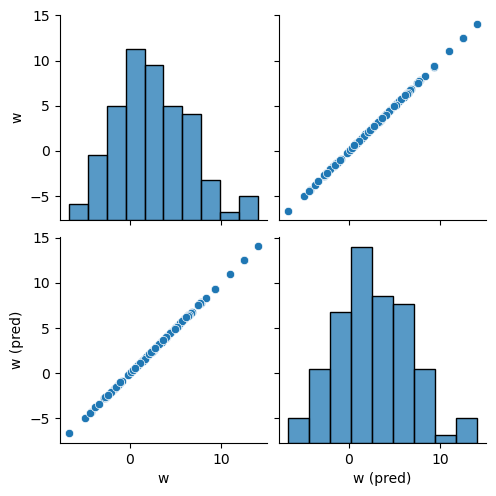

In [18]:
import seaborn as sns
sns.pairplot(df)
None